# Worksheet 02

Name:  Jeremy Bui and Rithvik Nakirikanti
UID: U87383281 and Zuizz Saeed (U08731461)

### Topics

- Effective Programming

### Effective Programming

a) What is a drawback of the top-down approach?

A drawback of the top-down approach is that dependencies may start only appearing towards the lower levels, which are left out from the initial higher phases. This can lead to a large number of revisions of the code, leading to a greater consumption of time and money.

b) What is a drawback of the bottom up approach?

A drawback of the bottom-up is the potential lack of vision when creating independent components. The approach may lead to inconsistencies and challenges for the overall code. 

c) What are 3 things you can do to have a better debugging experience?

Three things you can do are: 
1: Read the errors - what the error is telling you, where did the error occur, and is it a cause or symptom? 
2: Re-read your code - try to mentally trace your code to see if you can reproduce the error in your head. If you can't, your code may be too complex. 
3: Take breaks - it was recommended in the lecture that after around an hour of debugging, take a step back from the coding environment. 

d) (Optional) Follow along with the live coding. You can write your code here:

In [ ]:
Class Board: 
    def __init__(self):
        self.board = [["-" for _ in range(8)] for _ in range(8)]

    def __repr__(self):
        res = ""
        for row in range(8):
            for col in range(8)
                res += self.board[row][col]
                res += " "
            res += "\n"
        return res

def set_queen_at(self,row,col):
    self.board[row][col] = "Q"

def unset_queen_on(self,row):
    self.board[row] = ["-" for _ in range(8)]

def is_valid_move(self,row,col):
    if not self.is_valid_row(self,row,col)
        return False
    return True

def get_queen_on_row(self,row):
    for i in range(8)
        if self.board[row] == "Q":
            return i
        raise ValueError("no queen on row")

def find_solution(self):
    row = 0
    col = 0
    while row < 8: 
        if self.is_valid_move(row,col):
            self.set_queen_at(row,col)
            row += 1
            col = 0
        else: 
            col += 1
            if col >= 8:
                col = self.get_queen_on_row(row-1)
                col += 1
                row -= 1
    print("Found a solution: ")
    print(self)

test = Board()
print(test)

## Exercise

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

The goal of this exercise is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops
3. code spans multiple lines

look through the pandas documentation for alternatives. This [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) may come in handy.

a) Complete the code below to read in a filepath to the `train.csv` and returns the DataFrame.

In [8]:
import pandas as pd

filepath = "train.csv"
df = pd.read_csv(filepath)
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


b) Complete the code so it returns the number of rows that have at least one empty column value

In [3]:
num_rows = df.isna().any(axis=1).sum()
print("there are " +  str(num_rows) + " rows with at least one empty value")

there are 708 rows with at least one empty value


c) Complete the code below to remove all columns with more than 200 NaN values

In [6]:
df = df.loc[:, df.isna().sum() <= 200]
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

d) Complete the code below to replaces `male` with 0 and `female` with 1

In [10]:
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


e) Complete the code below to add four columns `First Name`, `Middle Name`, `Last Name`, and `Title` corresponding to the value in the `name` column.

For example: `Braund, Mr. Owen Harris` would be: 

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

Anything not clearly one of the above 4 categories can be ignored.

In [11]:
df['Title'] = df['Name'].str.extract('(\w+)\.', expand=True)
df['Last Name'] = df['Name'].str.split(',').str[0]
df['First Name'] = df['Name'].str.split(',').str[1].str.split().str[1]
df['Middle Name'] = df['Name'].str.split(',').str[1].str.split().str[2:]
df['Middle Name'] = df['Middle Name'].apply(lambda x: ' '.join(x) if x else '')

df[['First Name', 'Middle Name', 'Last Name', 'Title']] = df[['First Name', 'Middle Name', 'Last Name', 'Title']]

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Last Name,First Name,Middle Name
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,Owen,Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,John,Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,Laina,
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle,Jacques,Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Mr,Allen,William,Henry


f) Complete the code below to replace all missing ages with the average age

In [12]:
average_age = df['Age'].mean()

df['Age'] = df['Age'].fillna(average_age)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Last Name,First Name,Middle Name
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,Owen,Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,John,Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,Laina,
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle,Jacques,Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Mr,Allen,William,Henry


g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe.

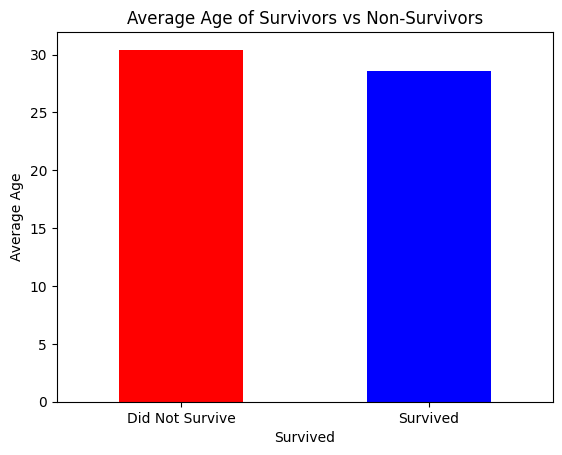

In [15]:
import matplotlib.pyplot as plt

average_age_by_survival = df.groupby('Survived')['Age'].mean()

average_age_by_survival.plot(kind='bar', color=['red', 'blue'])
plt.title('Average Age of Survivors vs Deceased')
plt.xlabel('Survived')
plt.ylabel('Average Age')
plt.xticks(ticks=[0, 1], labels=['Deceased', 'Survived'], rotation=0)
plt.show()
